In [106]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
typ= {"marketing", "sales","finanse","inzynieria","hr"}
doswiadczenie = {"doswiadczenie_staz-junior", "doswiadczenie_specjalista-mid", "doswiadczenie_starszy-specjalista-senior", "doswiadczenie_manager-c-level"}

In [ ]:
def price_range_to_integers(price):
    return int(price.replace(" ",""))

dictionary = {}
dictionary2 = {}

for typPracy in typ:
    dictionary2 = {}

    for dosw in doswiadczenie:
        page = requests.get(("https://rocketjobs.pl/wszystkie-lokalizacje/{}/{}/widelki_tak").format(typPracy,dosw))
        soup = BeautifulSoup(page.content, 'html5lib')
        offers = soup.find_all(class_='MuiBox-root css-6vg4fr')

        job_offers = []

        for offer in offers:
            job_name = offer.find('h2', class_='css-g9dzcj').get_text()
            price_range = re.findall(r'\d+\s\d+', offer.find(class_='css-lz8wxo').get_text())
            price_low = price_range_to_integers(price_range[0])

            try:
                price_up = price_range_to_integers(price_range[1])
            except IndexError:
                price_up =  price_range_to_integers(price_range[0])

            job_offers.append([price_low,price_up])
        value2 = [pd.DataFrame(job_offers)[0].mean(),pd.DataFrame(job_offers)[1].mean()]
        dictionary2[dosw] = value2
    dictionary[typPracy] = dictionary2

In [346]:
print(dictionary['finanse'])
print(dictionary['inzynieria'])

{'doswiadczenie_starszy-specjalista-senior': [10800.0, 15800.0], 'doswiadczenie_specjalista-mid': [7250.0, 9183.333333333334], 'doswiadczenie_manager-c-level': [9200.0, 11066.666666666666], 'doswiadczenie_staz-junior': [5133.333333333333, 6566.666666666667]}
{'doswiadczenie_starszy-specjalista-senior': [5485.714285714285, 6742.857142857143], 'doswiadczenie_specjalista-mid': [7141.379310344828, 11186.206896551725], 'doswiadczenie_manager-c-level': [12000.0, 17000.0], 'doswiadczenie_staz-junior': [4700.0, 7500.0]}


In [318]:
for job in dictionary.keys():
    print(job)
    print(dictionary[job])

finanse
{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junior': [3979.310344827586, 6093.103448275862]}
inzynieria
{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junior': [3979.310344827586, 6093.103448275862]}
marketing
{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junior': [3979.310344827586, 6093.103448275862]}
hr
{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 158

{'doswiadczenie_starszy-specjalista-senior': [10800.0, 15800.0], 'doswiadczenie_specjalista-mid': [7250.0, 9183.333333333334], 'doswiadczenie_manager-c-level': [9200.0, 11066.666666666666], 'doswiadczenie_staz-junior': [5133.333333333333, 6566.666666666667]}


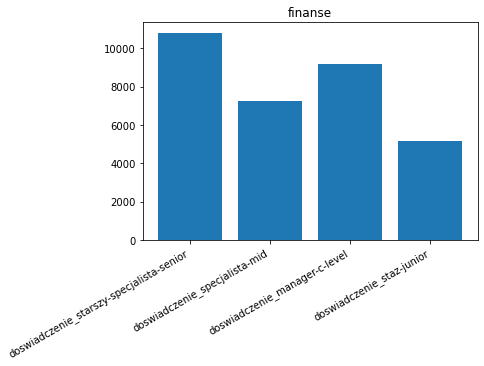

{'doswiadczenie_starszy-specjalista-senior': [5485.714285714285, 6742.857142857143], 'doswiadczenie_specjalista-mid': [7141.379310344828, 11186.206896551725], 'doswiadczenie_manager-c-level': [12000.0, 17000.0], 'doswiadczenie_staz-junior': [4700.0, 7500.0]}


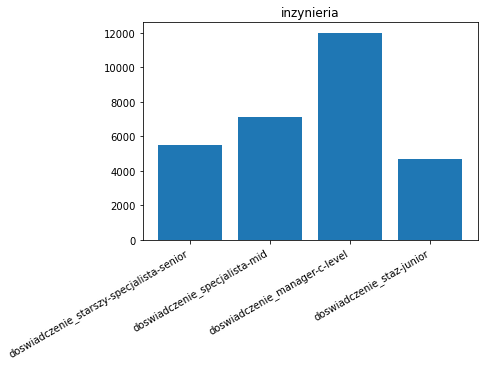

{'doswiadczenie_starszy-specjalista-senior': [8682.432432432432, 13129.72972972973], 'doswiadczenie_specjalista-mid': [6347.32, 9671.8], 'doswiadczenie_manager-c-level': [13563.157894736842, 18321.052631578947], 'doswiadczenie_staz-junior': [3820.3333333333335, 5164.0]}


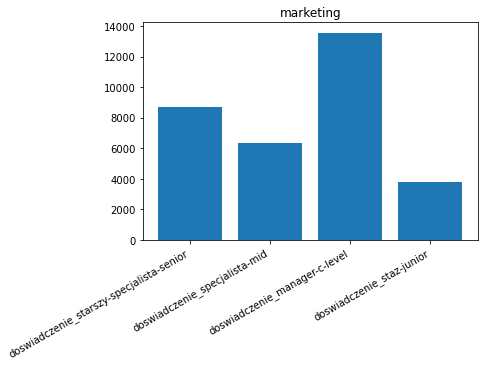

{'doswiadczenie_starszy-specjalista-senior': [8935.29411764706, 12094.117647058823], 'doswiadczenie_specjalista-mid': [6861.111111111111, 10169.5], 'doswiadczenie_manager-c-level': [16000.0, 18000.0], 'doswiadczenie_staz-junior': [4036.9565217391305, 5665.217391304348]}


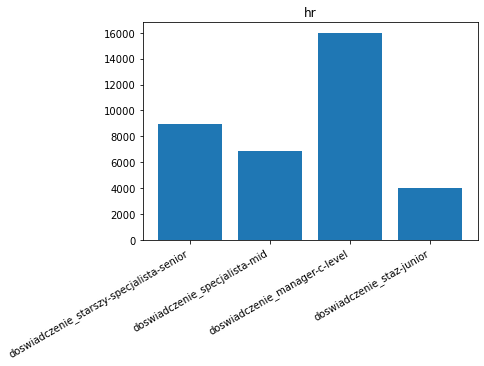

{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junior': [3979.310344827586, 6093.103448275862]}


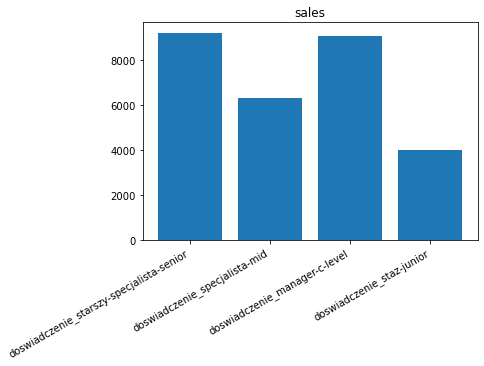

In [348]:

for jobName in dictionary.keys():
    fig, ax = plt.subplots()
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    tempDict = dictionary[jobName]
    fruits = []
    counts = []
    for exp in tempDict.keys():
        fruits.append(exp)
        counts.append(tempDict[exp][0])

    ax.bar(fruits, counts)

    ax.set_title(jobName)

    plt.show()